# Feature engineering

## Load data

In [164]:
import pandas as pd

client_data = pd.read_csv("./data/client_data.csv")
price_data = pd.read_csv("./data/price_data.csv")

pd.set_option('display.max_columns', None)



In [165]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [166]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [167]:
client_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [168]:
price_data.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


## Feature engineering

### Changing to date format

In [169]:
def change_to_date_type(data, columns, current_format):
    data = data.copy()
    for column in columns:
        data[column] = pd.to_datetime(data[column], format=current_format)
    return data

In [170]:
client_data = change_to_date_type(client_data, ["date_activ", "date_end", "date_modif_prod", "date_renewal"], "%Y-%m-%d")

In [171]:
price_date = change_to_date_type(price_data, ["price_date"], "%Y-%m-%d")

### Difference between off-peak prices in December and preceding January

In [172]:
dec_prices_var = price_data.sort_values(by=['price_date']).groupby(['id'])[["id", 'price_off_peak_var']].nth(-1).reset_index()
# price_data.groupby(["id", "price_date"]).apply(lambda x: x.sort_values(by=["price_date"]))["price_off_peak_var"].nth(0)
# 
jan_prices_var = price_data.sort_values(by=['price_date']).groupby(['id'])[["id", 'price_off_peak_var']].nth(0).reset_index()

diff = pd.merge(
    dec_prices_var.rename(
        columns={"price_off_peak_var": "dec_price_var"}
    ), 
    jan_prices_var.rename(
        columns={"price_off_peak_var": "jan_price_var"}
    ), 
    on="id"
)

diff = diff.drop(["index_x", "index_y"], axis=1)
diff["dec_jan_diff_price_energy"] = diff["dec_price_var"]-diff["jan_price_var"]
diff

dec_prices_fix = price_data.sort_values(by=['price_date']).groupby(['id'])[["id", 'price_off_peak_fix']].nth(-1).reset_index()
jan_prices_fix = price_data.sort_values(by=['price_date']).groupby(['id'])[["id", 'price_off_peak_fix']].nth(0).reset_index()
diff = pd.merge(
    diff,
    pd.merge(
    dec_prices_fix.rename(
        columns={"price_off_peak_fix": "dec_price_fix"}
    ), 
    jan_prices_fix.rename(
        columns={"price_off_peak_fix": "jan_price_fix"}
    ), on="id"),
    on="id"
)
diff["dec_jan_diff_price_power"] = diff["dec_price_fix"]-diff["jan_price_fix"]
diff = diff.drop(["dec_price_var", "jan_price_var", "index_x", "dec_price_fix", "index_y", "jan_price_fix"], axis=1)
diff

,id,dec_jan_diff_price_energy,dec_jan_diff_price_power
0,580d096fd515ab9501188e492c47810d,-0.002067,0.177779
1,591826b48e75c693e0317506ee18655b,-0.004547,0.177779
2,b583694e70d59d7cfe5873869111a649,-0.008499,-0.000001
3,f450ea1f5e55a0edb889a072d5c70c3e,-0.005795,0.000006
4,1c65d82e5ac151a43656de3fc026fc8e,-0.003423,0.177779
...,...,...,...
16091,12b5f3733bf9ed9fe097c7c8c43a37d8,-0.009328,0.162916
16092,b8d738c6a42465e0afb54f16b4b061de,-0.007801,0.162916
16093,3b3510bf7dacaba392ae4f6391cfdde7,0.058064,1.493999
16094,4e5704e9374e4fa7693aa484893f3429,-0.003767,0.177779


Joining client data with price difference data

In [173]:
data = pd.merge(client_data, diff, on="id")


### mean of all months prices 

In [174]:
price_mean = price_data.groupby("id")[
    [
        "price_off_peak_var", 
        "price_peak_var", 
        "price_mid_peak_var", 
        "price_off_peak_fix",
        "price_peak_fix",
        "price_mid_peak_fix"
    ]
].mean().reset_index()

price_mean.head()

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000


Merging the mean price with client and price difference dataframe.

In [175]:
data = pd.merge(data, price_mean, on="id")
data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,dec_jan_diff_price_energy,dec_jan_diff_price_power,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,0.020057,3.700961,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,-0.003767,0.177779,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,-0.004670,0.177779,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,-0.004547,0.177779,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,-0.006192,0.162916,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263


### Remove non-useful features

Removing `date_activ`, `date_end`, `date_modif_prod`, `date_renewal` as these columns cannot be used for generalization.

In [176]:
data = data.drop(["date_activ", "date_end", "date_modif_prod", "date_renewal"], axis=1)
data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,dec_jan_diff_price_energy,dec_jan_diff_price_power,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,0.020057,3.700961,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,-0.003767,0.177779,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,-0.004670,0.177779,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,-0.004547,0.177779,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,-0.006192,0.162916,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263


Removing `id` column as it just identifies individual companies and cannot be used for generalization.

In [177]:
data = data.drop(["id"], axis=1)
data.head()

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,dec_jan_diff_price_energy,dec_jan_diff_price_power,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,0.020057,3.700961,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340
1,MISSING,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,-0.003767,0.177779,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000
2,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,-0.004670,0.177779,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000
3,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,-0.004547,0.177779,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000
4,MISSING,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,-0.006192,0.162916,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263


### Label encoding

In [178]:
from sklearn.preprocessing import LabelEncoder

l_encode = LabelEncoder()

data["has_gas"] = l_encode.fit_transform(data["has_gas"])

data

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,dec_jan_diff_price_energy,dec_jan_diff_price_power,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,0.020057,3.700961,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340
1,MISSING,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,-0.003767,0.177779,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000
2,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,-0.004670,0.177779,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000
3,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,-0.004547,0.177779,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000
4,MISSING,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,-0.006192,0.162916,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,1,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0,-0.008653,0.177779,0.144124,0.000000,0.000000,44.370635,0.000000,0.000000
14602,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,0,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1,-0.007395,0.236694,0.106799,0.095406,0.070817,59.015674,36.393379,8.345418
14603,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,0,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1,-0.006192,0.162916,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
14604,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,0,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0,-0.003767,0.177779,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000


### One hot encoding

One hot encoding `channel_sales` and `origin_up`.

In [179]:
channel_sales_onehot = pd.get_dummies(data["channel_sales"], prefix="channel_sales").astype("int")
origin_up_onehot = pd.get_dummies(data["origin_up"], prefix="origin_up").astype("int")
data = pd.concat([data, channel_sales_onehot, origin_up_onehot], axis=1)
data = data.drop(["channel_sales", "origin_up"], axis=1)
data.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,dec_jan_diff_price_energy,dec_jan_diff_price_power,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,channel_sales_MISSING,channel_sales_epumfxlbckeskwekxbiuasklxalciiuu,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf,origin_up_MISSING,origin_up_ewxeelcelemmiwuafmddpobolfuxioce,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp
0,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.00,25.44,25.44,2,678.99,3,43.648,1,0.020057,3.700961,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.00,16.38,16.38,1,18.89,6,13.800,0,-0.003767,0.177779,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.00,28.60,28.60,1,6.60,6,13.856,0,-0.004670,0.177779,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.00,30.22,30.22,1,25.46,6,13.200,0,-0.004547,0.177779,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0,52.32,44.91,44.91,1,47.98,6,19.800,0,-0.006192,0.162916,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263,1,0,0,0,0,0,0,0,0,0,1,0,0,0


## Train test split

In [180]:
X = data.iloc[:, data.columns!="churn"]
X.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,dec_jan_diff_price_energy,dec_jan_diff_price_power,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,channel_sales_MISSING,channel_sales_epumfxlbckeskwekxbiuasklxalciiuu,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf,origin_up_MISSING,origin_up_ewxeelcelemmiwuafmddpobolfuxioce,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp
0,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.00,25.44,25.44,2,678.99,3,43.648,0.020057,3.700961,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.00,16.38,16.38,1,18.89,6,13.800,-0.003767,0.177779,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.00,28.60,28.60,1,6.60,6,13.856,-0.004670,0.177779,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.00,30.22,30.22,1,25.46,6,13.200,-0.004547,0.177779,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0,52.32,44.91,44.91,1,47.98,6,19.800,-0.006192,0.162916,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [181]:
y = pd.Series(data.loc[:, "churn"])
y

0        1
1        0
2        0
3        0
4        0
        ..
14601    0
14602    1
14603    1
14604    0
14605    0
Name: churn, Length: 14606, dtype: int64

In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [183]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10224 entries, 9303 to 7270
Data columns (total 40 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   cons_12m                                        10224 non-null  int64  
 1   cons_gas_12m                                    10224 non-null  int64  
 2   cons_last_month                                 10224 non-null  int64  
 3   forecast_cons_12m                               10224 non-null  float64
 4   forecast_cons_year                              10224 non-null  int64  
 5   forecast_discount_energy                        10224 non-null  float64
 6   forecast_meter_rent_12m                         10224 non-null  float64
 7   forecast_price_energy_off_peak                  10224 non-null  float64
 8   forecast_price_energy_peak                      10224 non-null  float64
 9   forecast_price_pow_off_peak               

In [184]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 10224 entries, 9303 to 7270
Series name: churn
Non-Null Count  Dtype
--------------  -----
10224 non-null  int64
dtypes: int64(1)
memory usage: 159.8 KB


In [185]:
y_train[X_train.index]

9303     0
13768    0
14429    0
4679     0
12119    0
        ..
5191     0
13418    0
5390     0
860      0
7270     0
Name: churn, Length: 10224, dtype: int64

## Scaling

In [186]:
from sklearn.preprocessing import StandardScaler

s_scale = StandardScaler()

s_scale.fit(X_train)

X_train_scaled = pd.DataFrame(s_scale.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(s_scale.transform(X_test), columns=X_test.columns)

## Model

Building and training random forest classifier.

In [187]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

kfold = KFold(n_splits=4)

rnd_classifier = RandomForestClassifier(n_estimators=500, random_state=2)

train_score = []

for train_idx, test_idx in kfold.split(X_train_scaled):
    rnd_classifier.fit(X_train_scaled.iloc[train_idx, :], y_train.iloc[train_idx])
    train_score.append(rnd_classifier.score(X_train_scaled.iloc[test_idx, :], y_train.iloc[test_idx]))
# X_train.iloc[train_idx, :]    
# y_train.iloc[train_idx]
print(train_score)


[0.9045383411580594, 0.9061032863849765, 0.911189358372457, 0.9072769953051644]


The accuracy of model in around 91%.

Trainig the model using entire training set.

In [188]:
rnd_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=500, random_state=2)

### Evaluating model performance on test set

In [189]:
rnd_classifier.score(X_test, y_test)

0.8995892286627111

The accuracy is around 90%.

### Feature importance

Text(0.5, 1.0, 'feature importance')

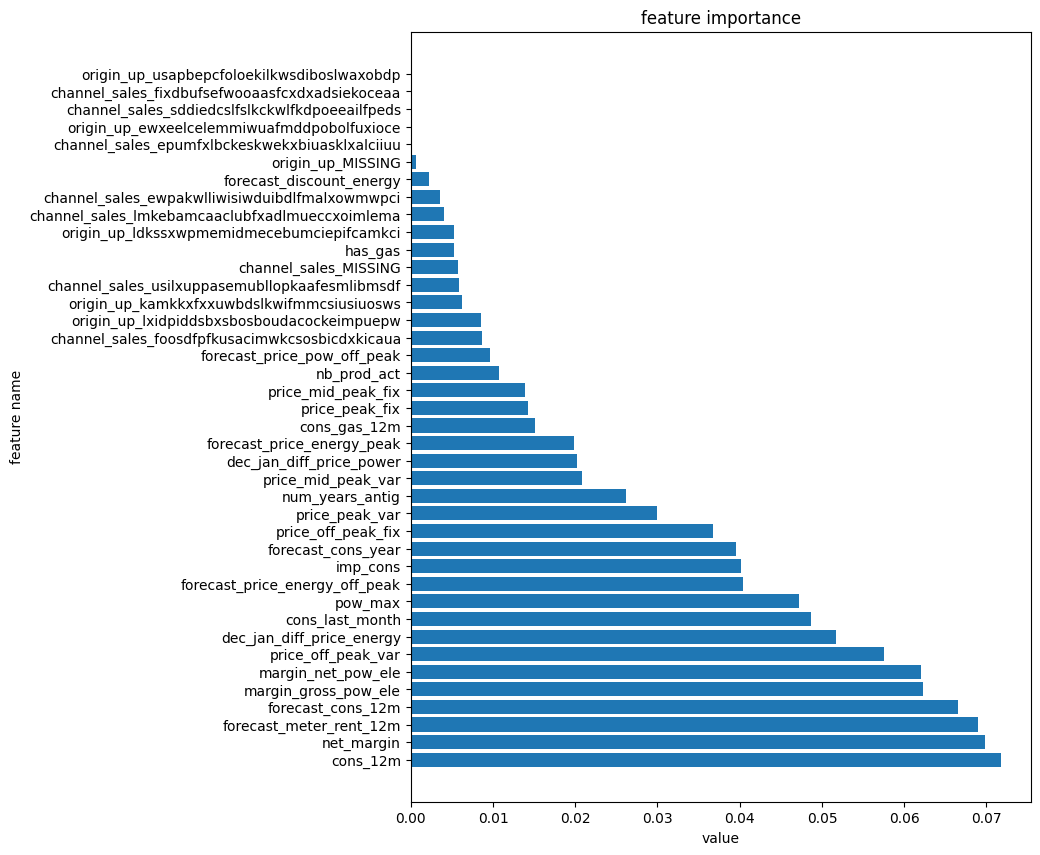

In [190]:
import matplotlib.pyplot as plt

feature_df = pd.DataFrame(columns=["feature_name", "importance"])
for feature_value, feature in zip(rnd_classifier.feature_importances_, X.columns):
    feature_value = round(feature_value, 4)
    #print(feature_value," : ", feature)
    feature_df = pd.concat(
        [feature_df, 
        pd.DataFrame(
            {
                "feature_name": [feature], 
                "importance": [feature_value]
            },
        )],
        ignore_index=True
    )
feature_df = feature_df.sort_values(by=["importance"], ascending=False)

fig, ax = plt.subplots(figsize=(8, 10))
ax.barh(y=list(feature_df.loc[:,"feature_name"].values), width=list(feature_df.loc[:, "importance"].values))
ax.set_ylabel("feature name")
ax.set_xlabel("value")
ax.set_title("feature importance")


### Confusion matrix

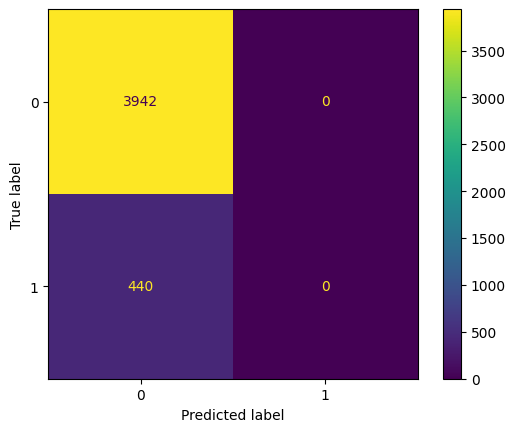

In [191]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = rnd_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()

The model has good performance when predicting non-churned customers, but it has poor performance when predicting true churned customers.